In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.shape

(21613, 21)

In [4]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18708,925069042,20150105T000000,713000.0,4,3.25,2840,54400,1.0,0,0,4,8,2840,0,1984,0,98053,47.6707,-122.045,2550,43560
17870,7340600735,20140603T000000,285000.0,3,1.75,2880,18296,1.0,0,0,3,8,1580,1300,1958,0,98168,47.4881,-122.281,1380,9592
20938,2771604196,20140812T000000,465000.0,2,1.50,1220,1120,2.5,0,0,3,8,1110,110,2008,0,98199,47.6374,-122.388,2010,3175
11912,4307330070,20140717T000000,419500.0,4,2.50,2550,7200,2.0,0,2,3,7,2550,0,2003,0,98056,47.4793,-122.180,2560,5715
19195,3530410081,20140626T000000,216500.0,2,1.75,1390,4482,1.0,0,0,4,8,1390,0,1980,0,98198,47.3785,-122.320,1390,4680


In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.value_counts('bedrooms').sort_index()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [9]:
df.value_counts('bathrooms').sort_index()

bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: count, dtype: int64

In [10]:
df.value_counts('floors').sort_index()

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: count, dtype: int64

In [11]:
print(df.value_counts('waterfront').sort_index())
print(df.value_counts('view').sort_index())

waterfront
0    21450
1      163
Name: count, dtype: int64
view
0    19489
1      332
2      963
3      510
4      319
Name: count, dtype: int64


In [12]:
print(df.value_counts('condition').sort_index())
print(df.value_counts('grade').sort_index())

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: count, dtype: int64
grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: count, dtype: int64


In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

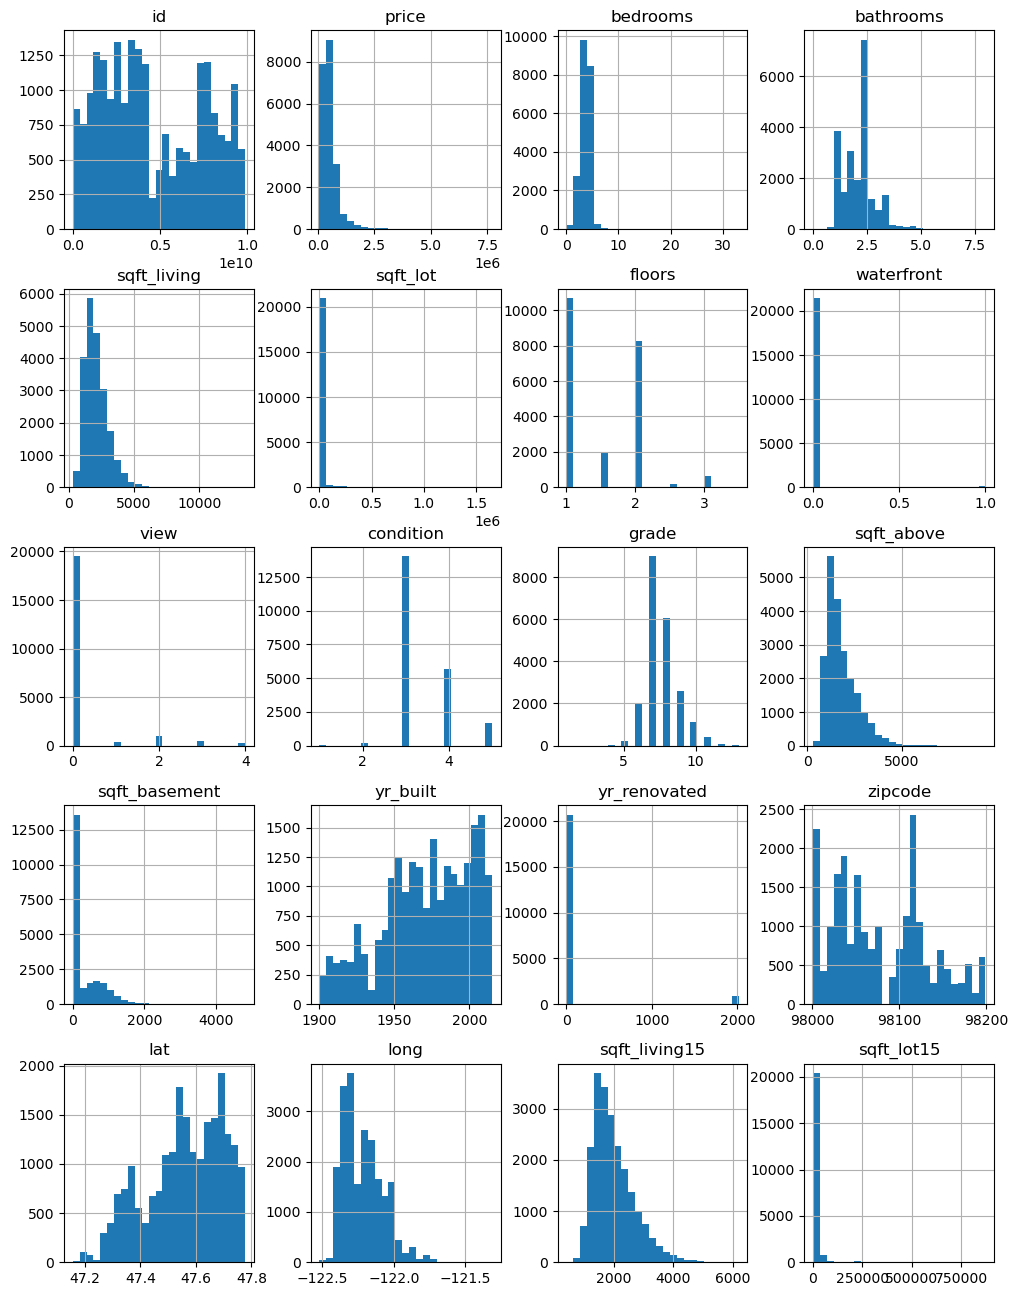

In [14]:
df.hist(bins=25, figsize=(12,16))

In [15]:
from sklearn.model_selection import KFold, train_test_split

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# Initialize K-Fold with the desired number of splits
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# Create a list to hold the K-Fold splits
kfold_splits = []

# Perform K-Fold splitting on the training set
for train_index, val_index in kfold.split(train_set, train_set['price']):
    kfold_train_set = train_set.iloc[train_index]
    kfold_val_set = train_set.iloc[val_index]
    kfold_splits.append([kfold_train_set, kfold_val_set])

# Example: To check the value counts of 'price' in the first K-Fold validation set
print(kfold_splits[0][1]['price'].value_counts() / len(kfold_splits[0][1]))

strat_train_set, strat_test_set = kfold_splits[0]
housing = strat_train_set.copy()


price
400000.0     0.010411
450000.0     0.010411
300000.0     0.009254
350000.0     0.008676
425000.0     0.008676
550000.0     0.008676
380000.0     0.008097
435000.0     0.007519
310000.0     0.007519
325000.0     0.007519
560000.0     0.006940
750000.0     0.006362
650000.0     0.006362
345000.0     0.005784
500000.0     0.005784
490000.0     0.005784
420000.0     0.005784
235000.0     0.005784
430000.0     0.005784
265000.0     0.005205
250000.0     0.005205
630000.0     0.005205
440000.0     0.005205
475000.0     0.005205
415000.0     0.005205
525000.0     0.005205
335000.0     0.004627
315000.0     0.004627
460000.0     0.004627
530000.0     0.004627
255000.0     0.004627
320000.0     0.004627
545000.0     0.004627
565000.0     0.004627
375000.0     0.004627
410000.0     0.004627
585000.0     0.004627
600000.0     0.004627
465000.0     0.004627
340000.0     0.004627
725000.0     0.004049
480000.0     0.004049
330000.0     0.004049
360000.0     0.004049
280000.0     0.004049
7600

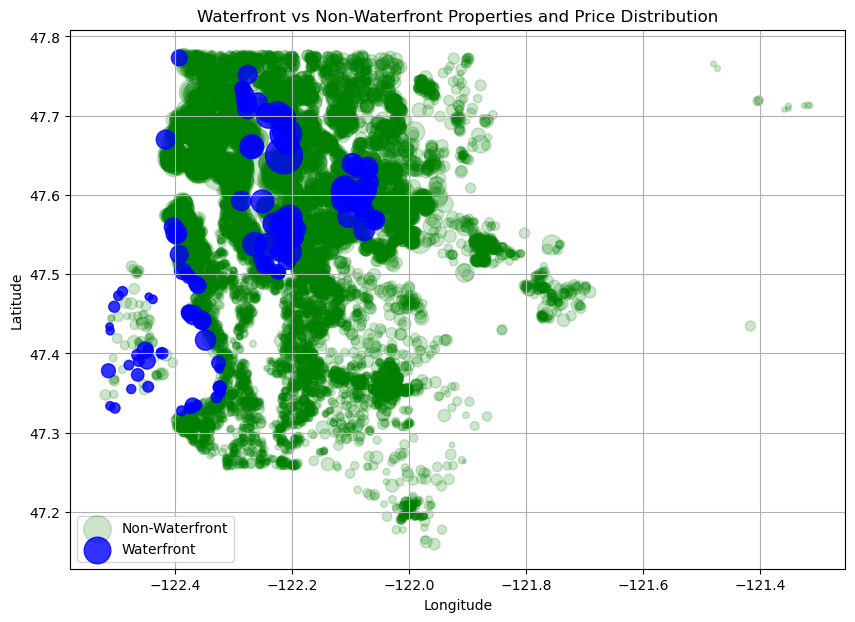

In [16]:
# Separate the data into waterfront and non-waterfront
waterfront = housing[housing["waterfront"] == True]
non_waterfront = housing[housing["waterfront"] == False]

# Plot non-waterfront properties first
non_waterfront.plot(kind="scatter", x="long", y="lat", grid=True, alpha=0.2,
                    c='green', s=non_waterfront["price"] / 10000, label="Non-Waterfront",
                    figsize=(10, 7))

# Plot waterfront properties on top
waterfront.plot(kind="scatter", x="long", y="lat", grid=True, alpha=0.8,
                c='blue', s=waterfront["price"] / 10000, label="Waterfront",
                figsize=(10, 7), ax=plt.gca())

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Waterfront vs Non-Waterfront Properties and Price Distribution")
plt.legend()
plt.show()


In [17]:
# Drop non-numeric columns
numeric_housing = housing.select_dtypes(include=[float, int])
corr_matrix = numeric_housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702117
grade            0.661618
sqft_above       0.603250
sqft_living15    0.581223
bathrooms        0.527001
view             0.394803
sqft_basement    0.321638
lat              0.308914
bedrooms         0.305564
waterfront       0.261540
floors           0.254021
yr_renovated     0.135902
sqft_lot         0.089794
sqft_lot15       0.077232
yr_built         0.044135
condition        0.034126
long             0.022010
id              -0.020989
zipcode         -0.051340
Name: price, dtype: float64

In [18]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15561 entries, 6325 to 15795
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15561 non-null  int64  
 1   date           15561 non-null  object 
 2   bedrooms       15561 non-null  int64  
 3   bathrooms      15561 non-null  float64
 4   sqft_living    15561 non-null  int64  
 5   sqft_lot       15561 non-null  int64  
 6   floors         15561 non-null  float64
 7   waterfront     15561 non-null  int64  
 8   view           15561 non-null  int64  
 9   condition      15561 non-null  int64  
 10  grade          15561 non-null  int64  
 11  sqft_above     15561 non-null  int64  
 12  sqft_basement  15561 non-null  int64  
 13  yr_built       15561 non-null  int64  
 14  yr_renovated   15561 non-null  int64  
 15  zipcode        15561 non-null  int64  
 16  lat            15561 non-null  float64
 17  long           15561 non-null  float64
 18  sqft_liv

In [20]:
housing.drop('id', axis = 1, inplace = True)
housing.drop('zipcode', axis = 1, inplace = True)
housing.drop('sqft_living15', axis = 1, inplace = True)
housing.drop('sqft_lot15', axis = 1, inplace = True)

In [21]:
housing.drop('date', axis = 1, inplace = True)

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15561 entries, 6325 to 15795
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15561 non-null  int64  
 1   bathrooms      15561 non-null  float64
 2   sqft_living    15561 non-null  int64  
 3   sqft_lot       15561 non-null  int64  
 4   floors         15561 non-null  float64
 5   waterfront     15561 non-null  int64  
 6   view           15561 non-null  int64  
 7   condition      15561 non-null  int64  
 8   grade          15561 non-null  int64  
 9   sqft_above     15561 non-null  int64  
 10  sqft_basement  15561 non-null  int64  
 11  yr_built       15561 non-null  int64  
 12  yr_renovated   15561 non-null  int64  
 13  lat            15561 non-null  float64
 14  long           15561 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 1.9 MB


In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = True)
linearmodel = reg.fit(housing, housing_labels)

In [24]:
housing_predictions = reg.predict(housing)
print(housing_predictions[:5].round(-2))
print(housing_labels.iloc[:5].values)

from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions,squared=False)
lin_rmse

[473100. 247500. 166000. 529400. 490800.]
[325000. 257000. 228500. 479000. 459900.]


200833.92753028809

In [25]:
from sklearn.model_selection import cross_val_score

linear_rmses = -cross_val_score(reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [26]:
pd.Series(linear_rmses).describe()

count        10.000000
mean     200208.773472
std       24806.670633
min      170884.337812
25%      185536.842735
50%      192600.215519
75%      212871.692447
max      253301.114200
dtype: float64

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
DTregmodel = tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)
print(housing_predictions[:5].round(-2))
print(housing_labels.iloc[:5].values)

from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions,squared=False)
lin_rmse

[325000. 257000. 228500. 479000. 459900.]
[325000. 257000. 228500. 479000. 459900.]


8892.256243147302

In [28]:
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [29]:
pd.Series(tree_rmses).describe()

count        10.000000
mean     181741.938467
std       14256.472396
min      166926.059543
25%      169235.193205
50%      179250.774906
75%      192699.642266
max      207755.635900
dtype: float64

In [30]:
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor()
RFmode = RFreg.fit(housing, housing_labels)

housing_predictions = RFreg.predict(housing)
print(housing_predictions[:5].round(-2))
print(housing_labels.iloc[:5].values)


[345500. 268900. 212400. 478300. 478900.]
[325000. 257000. 228500. 479000. 459900.]


In [31]:
RF_rmse = mean_squared_error(housing_labels, housing_predictions,squared=False)
lin_rmse

8892.256243147302

In [32]:
RF_rmses = -cross_val_score(RFreg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(RF_rmses).describe()

count        10.000000
mean     128463.352925
std       15652.602445
min      111512.815725
25%      117209.417011
50%      125633.603837
75%      136442.412857
max      163560.929664
dtype: float64

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("Keras is available within TensorFlow.")


Keras is available within TensorFlow.


In [34]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Is TensorFlow installed correctly?", hasattr(tf, 'keras'))

TensorFlow version: 2.10.0
Is TensorFlow installed correctly? True


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=[housing.shape[1]]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [36]:
# Train the model
history = model.fit(housing, housing_labels, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
389/389 [==============================] - 3s 7ms/step - loss: 223601360896.0000 - mae: 310933.0938 - val_loss: 65083088896.0000 - val_mae: 169261.1406
Epoch 2/10
389/389 [==============================] - 2s 4ms/step - loss: 77896482816.0000 - mae: 176908.4688 - val_loss: 59161878528.0000 - val_mae: 172217.7812
Epoch 3/10
389/389 [==============================] - 1s 4ms/step - loss: 72736833536.0000 - mae: 172861.0781 - val_loss: 56274190336.0000 - val_mae: 164789.1875
Epoch 4/10
389/389 [==============================] - 2s 4ms/step - loss: 70241804288.0000 - mae: 171106.2188 - val_loss: 56149139456.0000 - val_mae: 166513.9688
Epoch 5/10
389/389 [==============================] - 1s 4ms/step - loss: 68820869120.0000 - mae: 171020.8281 - val_loss: 57018109952.0000 - val_mae: 171938.9531
Epoch 6/10
389/389 [==============================] - 2s 4ms/step - loss: 68049051648.0000 - mae: 171965.6719 - val_loss: 55637549056.0000 - val_mae: 164460.2656
Epoch 7/10
389/389 [=======

In [37]:
# Use the model to make predictions
housing_predictions = model.predict(housing)
RF_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
RF_rmse

487/487 [==============================] - 1s 2ms/step


253536.66556679964

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [51]:
param_dist = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]            
}

In [52]:
import time
start_time = time.time()

# Fit a model with a small subset of parameters
RFreg = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
RFreg.fit(housing, housing_labels)

end_time = time.time()
print("Time for one fit:", end_time - start_time)


Time for one fit: 1.3778963088989258


In [53]:
# Initialize the RandomForestRegressor
RFreg = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(
    estimator=RFreg,
    param_distributions=param_dist,
    scoring="neg_root_mean_squared_error",
    n_iter=10,                
    cv=10,                     
    n_jobs=-1,                
    random_state=42,
    verbose=2                 
)

# Fit on the training data (housing and housing_labels)
random_search.fit(housing, housing_labels)

# Display the best parameters and the time taken
print("Best Parameters:", random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


In [44]:
test_set.drop('id', axis = 1, inplace = True)
test_set.drop('zipcode', axis = 1, inplace = True)
test_set.drop('sqft_living15', axis = 1, inplace = True)
test_set.drop('sqft_lot15', axis = 1, inplace = True)
test_set.drop('date', axis = 1, inplace = True)

In [56]:
best_rf_model = random_search.best_estimator_
test_predictions = best_rf_model.predict(housing)

rmse = np.sqrt(mean_squared_error(housing_labels, test_predictions))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 79396.29429696256


In [57]:
test_predictions = best_rf_model.predict(test_set.drop("price", axis=1))

rmse = np.sqrt(mean_squared_error(test_set["price"], test_predictions))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 146456.21367139684


In [62]:
import pickle

with open('final_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)